# Estuardo Funes Solares
# Carnet: 20032042
# Tarea 2: Outliers

## Importación de librerías

In [1]:
# Se importan las librerías que se van a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Se ve la estructura del dataset, 1460 registros y 81 variables o columnas

dataHP = pd.read_csv('train_HP.csv')
dataHP.shape

(1460, 81)

In [3]:
# Una vista rápida de los datos

dataHP.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## Función para Identificar los Tipos de Variables del Dataset

In [4]:
def getColumnTypes(dataset):
     """
        Descripcion: Esta función extrae el tipo de dominio de las columnas de un dataset.
        Entradas: Pandas Dataframe  
        Salida: Tupla con arreglo que contine nombres de las columnas.
     """
     continuas = []
     discretas = []
     categoricas = []
     for col in dataset.columns:
          if((dataset[col].dtype == 'int64') or (dataset[col].dtype == 'float64')):
               if(len(dataset[col].unique()) > 30): #criterio para discretas o continuas
                    continuas.append(col)
               else:
                    discretas.append(col)
          else:
               categoricas.append(col)

     return continuas, discretas, categoricas

In [5]:
# Se imprimen las diferentes categorías de las columnas, siendo estas continuas, discretas y categóricas

continuas, discretas, categoricas = getColumnTypes(dataHP)
print(continuas)
print(discretas)
print(categoricas)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gar

## Se revisa si hay valores NaN en las columnas

In [6]:
# Porcentaje de NaNs en las columnas, se puede ver que solo en algunas se tienen faltantes, en algunos casos de manera extrema en otras de manera reducida

Porcentajes =  dataHP.isnull().mean().sort_values(ascending=False)
Porcentajes.head(40)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageYrBlt      0.055479
GarageCond       0.055479
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtQual         0.025342
BsmtCond         0.025342
BsmtFinType1     0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
GrLivArea        0.000000
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea    

## Se revisa si hay Ceros ("0") en las columnas

In [7]:
# Revisar si hay columnas con valores "0"
zeros_in_cols = (dataHP == 0).sum() > 0

# Resultado
print(zeros_in_cols)


Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool


In [8]:
# Columnas con valores "0"

cols_with_zeros = zeros_in_cols[zeros_in_cols].index.tolist()
cols_with_zeros

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [9]:
# Como podemos ver hay muchas columnas con valores "0", los porcentajes más altos los vamos a eliminar, solo se dejaran los que sean menores a 5%

zero_pct = (dataHP[cols_with_zeros].astype(bool) == False).sum() / len(dataHP)
zero_pct_sorted = zero_pct.sort_values(ascending=False)

zero_pct_sorted


PoolArea         0.995205
3SsnPorch        0.983562
LowQualFinSF     0.982192
MiscVal          0.964384
BsmtHalfBath     0.943836
ScreenPorch      0.920548
BsmtFinSF2       0.885616
EnclosedPorch    0.857534
HalfBath         0.625342
MasVnrArea       0.589726
BsmtFullBath     0.586301
2ndFlrSF         0.567808
WoodDeckSF       0.521233
Fireplaces       0.472603
OpenPorchSF      0.449315
BsmtFinSF1       0.319863
BsmtUnfSF        0.080822
GarageCars       0.055479
GarageArea       0.055479
TotalBsmtSF      0.025342
FullBath         0.006164
BedroomAbvGr     0.004110
KitchenAbvGr     0.000685
dtype: float64

In [10]:
# Se hace un backup de la tabla

olddataHP = dataHP
olddataHP.shape

(1460, 81)

In [11]:
dataHP.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Se revisan algunas columnas para ver cómo viene los faltantes

In [12]:
# Se ve que cómo vienen los faltantes, en este caso viene "0".

dataHP['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [13]:
# Se ve que cómo vienen los faltantes, en este caso viene "NaN".

dataHP['LotFrontage'].head(40)

0      65.0
1      80.0
2      68.0
3      60.0
4      84.0
5      85.0
6      75.0
7       NaN
8      51.0
9      50.0
10     70.0
11     85.0
12      NaN
13     91.0
14      NaN
15     51.0
16      NaN
17     72.0
18     66.0
19     70.0
20    101.0
21     57.0
22     75.0
23     44.0
24      NaN
25    110.0
26     60.0
27     98.0
28     47.0
29     60.0
30     50.0
31      NaN
32     85.0
33     70.0
34     60.0
35    108.0
36    112.0
37     74.0
38     68.0
39     65.0
Name: LotFrontage, dtype: float64

In [14]:
# Se ve que cómo vienen los faltantes, en este caso viene "NaN".

dataHP['GarageYrBlt'].head(40)

0     2003.0
1     1976.0
2     2001.0
3     1998.0
4     2000.0
5     1993.0
6     2004.0
7     1973.0
8     1931.0
9     1939.0
10    1965.0
11    2005.0
12    1962.0
13    2006.0
14    1960.0
15    1991.0
16    1970.0
17    1967.0
18    2004.0
19    1958.0
20    2005.0
21    1930.0
22    2002.0
23    1976.0
24    1968.0
25    2007.0
26    2005.0
27    2008.0
28    1957.0
29    1920.0
30    1920.0
31    1966.0
32    2007.0
33    1959.0
34    2005.0
35    2004.0
36    1995.0
37    1954.0
38    1953.0
39       NaN
Name: GarageYrBlt, dtype: float64

In [15]:
# Extraemos los nombres de las columnas

cols_con_na = [col for col in dataHP.columns]
cols_con_na

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

### Extraemos Columnas con NAN

In [16]:
# Columnas que tienen al menos un registro con NaN

cols_con_na = [col for col in dataHP.columns if (dataHP[col].isnull().mean() > 0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Proporción de NAN en las columnas

In [17]:
# Proporción de NaN en cada columna. Podemos ver que son 19 columnas en total con NaN

prop_nan_per_col = dataHP[cols_con_na].isnull().mean().sort_values(ascending=False)
prop_nan_per_col

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

#### Columnas con NaN mayor a 20%

In [18]:
# Estas columnas se van a desechar, no se van a trabajar porque su porcentaje es demasiado alto

cols_con_na_mayor5porct = [col for col in dataHP.columns if (dataHP[col].isnull().mean() > 0.2)]
cols_con_na_mayor5porct

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

##### En base a lo anterior podemos ver que las variables que tienen altos porcentajes de NaN y que se han eliminado completamente del análisis son:

##### - PoolQC 
##### - MiscFeature
##### - Alley 
##### - Fence

In [19]:
# Vemos que los porcentajes de NaN son demasiados altos, no vale la pena trabajar con estas columnas

print(f"PoolQC:      {round(dataHP['PoolQC'].isnull().mean(),4)}")
print(f"MiscFeature: {round(dataHP['MiscFeature'].isnull().mean(),4)}")
print(f"Alley:       {round(dataHP['Alley'].isnull().mean(),4)}")
print(f"Fence:       {round(dataHP['Fence'].isnull().mean(),4)}")
print(f"FireplaceQu: {round(dataHP['FireplaceQu'].isnull().mean(),4)}")

PoolQC:      0.9952
MiscFeature: 0.963
Alley:       0.9377
Fence:       0.8075
FireplaceQu: 0.4726


### Se eliminan (desechan) las columnas con alto porcentajes de NaN o Ceros("0")

In [20]:
# Se eliminan las columnas con NaN mayores a 20%

dataHP = dataHP.drop([col for col in dataHP.columns if (dataHP[col].isnull().mean() > 0.50)], axis=1)

In [21]:
# Se eliminan las columnas con un alto porcentajes de valores "0" porque no sabemos si representa un cero o un valor faltante.

dataHP = dataHP.drop(['PoolArea','3SsnPorch','LowQualFinSF','MiscVal','BsmtHalfBath','ScreenPorch','BsmtFinSF2','EnclosedPorch','HalfBath','MasVnrArea','BsmtFullBath','2ndFlrSF','WoodDeckSF','Fireplaces','OpenPorchSF','BsmtFinSF1'], axis=1)

In [22]:
# Tipo de datos de cada columna

dataHP.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 61, dtype: object

In [23]:
col2 = dataHP.columns
len(col2)

61

In [24]:
dataHP.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', 'GrLivArea',
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

### Columnas Rescatables

In [25]:
cols_rescatables = [col for col in dataHP.columns if (dataHP[col].isnull().mean()<=0.05)]
cols_rescatables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'SalePrice']

In [26]:
# Estas columnas todavía se pueden trabajar porque sus NaN son menores de 20%

cols_con_na_entre5_20 = [col for col in dataHP.columns if (dataHP[col].isnull().mean() > 0 and dataHP[col].isnull().mean() < 0.20)]
cols_con_na_entre5_20

['LotFrontage',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

##### Las variables que se le aplicará Imputación de Variable de Media porque el porcentaje está entre 5% y 20% son:

##### - LotFrontage 
##### - MasVnrType 
##### - BsmtQual 
##### - BsmtCond 
##### - BsmtExposure 
##### - BsmtFinType1 
##### - BsmtFinType2 
##### - Electrical 
##### - GarageType 
##### - GarageYrBlt 
##### - GarageFinish 
##### - GarageCond 


In [27]:
# Vemos que los porcentajes de NaN son bajos, todavía se pueden trabajar o hacer imputación

print(f"LotFrontage:   {round(dataHP['LotFrontage'].isnull().mean(),4)}")
print(f"MasVnrType:    {round(dataHP['MasVnrType'].isnull().mean(),4)}")
print(f"BsmtQual:      {round(dataHP['BsmtQual'].isnull().mean(),4)}")
print(f"BsmtCond:      {round(dataHP['BsmtCond'].isnull().mean(),4)}")
print(f"BsmtExposure:  {round(dataHP['BsmtExposure'].isnull().mean(),4)}")
print(f"BsmtFinType1:  {round(dataHP['BsmtFinType1'].isnull().mean(),4)}")
print(f"BsmtFinType2:  {round(dataHP['BsmtFinType2'].isnull().mean(),4)}")
print(f"Electrical:    {round(dataHP['Electrical'].isnull().mean(),4)}")
print(f"GarageType:    {round(dataHP['GarageType'].isnull().mean(),4)}")
print(f"GarageYrBlt:   {round(dataHP['GarageYrBlt'].isnull().mean(),4)}")
print(f"GarageFinish:  {round(dataHP['GarageFinish'].isnull().mean(),4)}")
print(f"GarageQual:    {round(dataHP['GarageQual'].isnull().mean(),4)}")
print(f"GarageCond:    {round(dataHP['GarageCond'].isnull().mean(),4)}")


LotFrontage:   0.1774
MasVnrType:    0.0055
BsmtQual:      0.0253
BsmtCond:      0.0253
BsmtExposure:  0.026
BsmtFinType1:  0.0253
BsmtFinType2:  0.026
Electrical:    0.0007
GarageType:    0.0555
GarageYrBlt:   0.0555
GarageFinish:  0.0555
GarageQual:    0.0555
GarageCond:    0.0555


In [28]:
# Vemos los primeros 40 registros de las variables Rescatables para ver más a fondo los datos

dataHP[['LotFrontage', 'MasVnrType', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageYrBlt','GarageFinish','GarageCond']].head(40)
#data_HP_con_na_entre5_20.head(40)

,LotFrontage,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageCond
0,65.0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA
1,80.0,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA
2,68.0,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA
3,60.0,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA
4,84.0,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA
5,85.0,None,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,1993.0,Unf,TA
6,75.0,Stone,Ex,TA,Av,GLQ,Unf,SBrkr,Attchd,2004.0,RFn,TA
7,NaN,Stone,Gd,TA,Mn,ALQ,BLQ,SBrkr,Attchd,1973.0,RFn,TA
8,51.0,None,TA,TA,No,Unf,Unf,FuseF,Detchd,1931.0,Unf,TA
9,50.0,None,TA,TA,No,GLQ,Unf,SBrkr,Attchd,1939.0,RFn,TA


### Tipos de Variables de cada Columna ya sin Variables con NaN mayores a 20%

In [29]:
# Sacamos el tipo de variable solamente de las columnas con NaN

dataHP.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 61, dtype: object

### Complete Case Analysis (CCA)

In [30]:
data_HP_con_na_entre5_20 = dataHP[cols_con_na_entre5_20].dropna()
dataHP.shape, data_HP_con_na_entre5_20.shape


((1460, 61), (1094, 13))

In [31]:
data_HP_con_na_entre5_20.head(40)

,LotFrontage,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
5,85.0,None,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,1993.0,Unf,TA,TA
6,75.0,Stone,Ex,TA,Av,GLQ,Unf,SBrkr,Attchd,2004.0,RFn,TA,TA
8,51.0,None,TA,TA,No,Unf,Unf,FuseF,Detchd,1931.0,Unf,Fa,TA
9,50.0,None,TA,TA,No,GLQ,Unf,SBrkr,Attchd,1939.0,RFn,Gd,TA
10,70.0,None,TA,TA,No,Rec,Unf,SBrkr,Detchd,1965.0,Unf,TA,TA


In [32]:
# Dejamos solo las columnas que tienen casos completos, es decir, no tienen ningún NAN o nulo.
data_HP_noNAN = dataHP[cols_rescatables].dropna()
dataHP.shape, data_HP_noNAN.shape

((1460, 61), (1412, 54))

In [33]:
data_HP_noNAN.head(40)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,TotRmsAbvGrd,Functional,GarageCars,GarageArea,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,8,Typ,2,548,Y,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,6,Typ,2,460,Y,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,6,Typ,2,608,Y,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,7,Typ,3,642,Y,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,9,Typ,3,836,Y,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,5,Typ,2,480,Y,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,7,Typ,2,636,Y,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,7,Typ,2,484,Y,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,8,Min1,2,468,Y,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,5,Typ,1,205,Y,1,2008,WD,Normal,118000


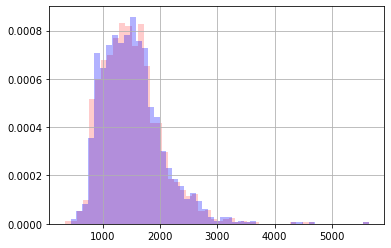

In [34]:
dataHP['GrLivArea'].hist(bins=50, density=True, color='red', alpha=0.2)
data_HP_noNAN['GrLivArea'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

### Imputación de Valores Numéricos con Media o Mediana

In [35]:
#Dataset Original
dataHP

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2,548,TA,TA,Y,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,2,460,TA,TA,Y,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,2,608,TA,TA,Y,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,3,642,TA,TA,Y,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,3,836,TA,TA,Y,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,2,460,TA,TA,Y,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,2,500,TA,TA,Y,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,1,252,TA,TA,Y,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,1,240,TA,TA,Y,4,2010,WD,Normal,142125


In [36]:
# Columnas Rescatables

data_HP_noNAN.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'GarageCars', 'GarageArea', 'PavedDrive', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [37]:
#Dataset solo de Columnas Rescatables

data_HP_con_na_entre5_20.head(40)

,LotFrontage,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
5,85.0,None,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,1993.0,Unf,TA,TA
6,75.0,Stone,Ex,TA,Av,GLQ,Unf,SBrkr,Attchd,2004.0,RFn,TA,TA
8,51.0,None,TA,TA,No,Unf,Unf,FuseF,Detchd,1931.0,Unf,Fa,TA
9,50.0,None,TA,TA,No,GLQ,Unf,SBrkr,Attchd,1939.0,RFn,Gd,TA
10,70.0,None,TA,TA,No,Rec,Unf,SBrkr,Detchd,1965.0,Unf,TA,TA


### Hacemos imputación de Media en Columnas Numéricas

<div align="justify">
La Imputación de Media se puede hacer por medio de una función de manera automática, la cual se presenta a continuación. También es importante mencionar que debido a que se descartaron las columnas con altos porcentajes de NaN y Ceros("0"), el proceso solamente se hará en 2 variables numéricas y en 10 variables categóricas
    </div>

### Función para hacer la imputación de variables numéricas de manera automática

In [45]:
# Función para automatizar el proceso

def impute_median(dataHP, cols):
    for col in cols:
        median = dataHP[col].median()
        dataHP[col] = dataHP[col].replace({0: np.nan})  # replace zeros with NaNs
        dataHP[col] = dataHP[col].fillna(median)  # fill NaNs with median value
    return dataHP

### *Variables Numéricas que se hará la imputación*

In [46]:
cols_to_impute = ['BsmtUnfSF', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr','LotFrontage','GarageYrBlt']
dataHP = impute_median(dataHP, cols_to_impute)

In [47]:
dataHP [['BsmtUnfSF', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr','LotFrontage','GarageYrBlt']].head(40)

,BsmtUnfSF,GarageCars,GarageArea,TotalBsmtSF,FullBath,BedroomAbvGr,KitchenAbvGr,LotFrontage,GarageYrBlt
0,150.0,2.0,548.0,856.0,2.0,3.0,1.0,65.0,2003.0
1,284.0,2.0,460.0,1262.0,2.0,3.0,1.0,80.0,1976.0
2,434.0,2.0,608.0,920.0,2.0,3.0,1.0,68.0,2001.0
3,540.0,3.0,642.0,756.0,1.0,3.0,1.0,60.0,1998.0
4,490.0,3.0,836.0,1145.0,2.0,4.0,1.0,84.0,2000.0
5,64.0,2.0,480.0,796.0,1.0,1.0,1.0,85.0,1993.0
6,317.0,2.0,636.0,1686.0,2.0,3.0,1.0,75.0,2004.0
7,216.0,2.0,484.0,1107.0,2.0,3.0,1.0,69.0,1973.0
8,952.0,2.0,468.0,952.0,2.0,2.0,2.0,51.0,1931.0
9,140.0,1.0,205.0,991.0,1.0,2.0,2.0,50.0,1939.0


### Imputación de Valores Categóricas

In [48]:
# Dataset solamente con las variables categóricas
dataset_cat_missing = dataHP[['MasVnrType', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageCond', 'SalePrice']]
dataset_cat_missing

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageCond,SalePrice
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,208500
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,181500
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,223500
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,140000
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,None,Gd,TA,No,Unf,Unf,SBrkr,Attchd,RFn,TA,175000
1456,Stone,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,Unf,TA,210000
1457,None,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,266500
1458,None,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,Unf,TA,142125


In [49]:
# Viendo la cantidad de NAN de las columnas categóricas nuevamente

dataset_cat_missing.isnull().mean().sort_values(ascending=False)

GarageType      0.055479
GarageFinish    0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
Electrical      0.000685
SalePrice       0.000000
dtype: float64

#### Variable _MasVnrType_

In [50]:
# Revisando cuántos registros trae la variable de cada valor

dataHP['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [51]:
# Revisando porcentaje de registros trae la variable 

dataHP['MasVnrType'].value_counts()/len(dataset_cat_missing)

None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

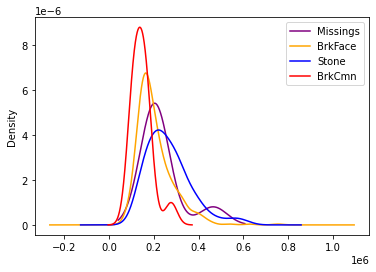

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['MasVnrType'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'BrkFace']['SalePrice'].plot(kind="kde", color="orange", label="BrkFace")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'Stone']['SalePrice'].plot(kind="kde", color="blue", label="Stone")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'BrkCmn']['SalePrice'].plot(kind="kde", color="red", label="BrkCmn")

ax.legend()
plt.show()

In [54]:
# Imputación de variable categórica

dataset_cat_missing['MasVnrType'].fillna(value='BrkFace', inplace=True)

In [55]:
# Comprobación de que aumento la categoría BrkFace, anteriormente habían 445 y ahora hay 453 registros.

dataset_cat_missing['MasVnrType'].value_counts()

None       864
BrkFace    453
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

#### Variable _BsmtQual_

In [56]:
dataHP['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [57]:
dataHP['BsmtQual'].value_counts()/len(dataset_cat_missing)

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

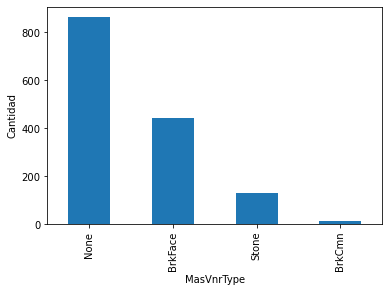

In [58]:
dataHP['MasVnrType'].value_counts().plot.bar()
plt.ylabel('Cantidad')
plt.xlabel('MasVnrType')
plt.show()

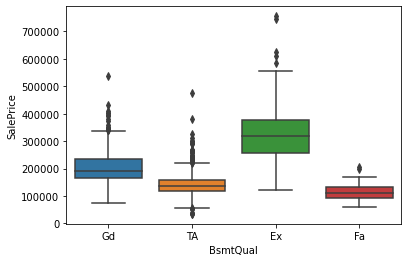

In [59]:
sns.boxplot(x=dataset_cat_missing['BsmtQual'], y= dataset_cat_missing['SalePrice'])
plt.show()

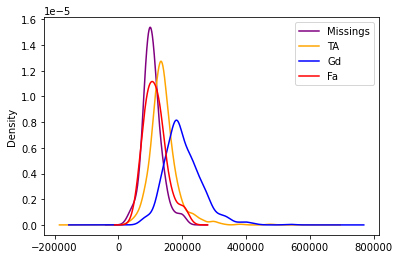

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'TA']['SalePrice'].plot(kind="kde", color="orange", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Fa']['SalePrice'].plot(kind="kde", color="red", label="Fa")

ax.legend()
plt.show()

In [62]:
dataset_cat_missing.loc[:, 'BsmtQual'].fillna(value='Fa', inplace=True)

In [63]:
# Comprobación de que aumento la categoría FA, anteriormente habían 35 y ahora hay 72 registros.

dataset_cat_missing['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     72
Name: BsmtQual, dtype: int64

#### Variable _BsmtCond_

In [64]:
dataHP['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [65]:
dataHP['BsmtCond'].value_counts()/len(dataset_cat_missing)

TA    0.897945
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64

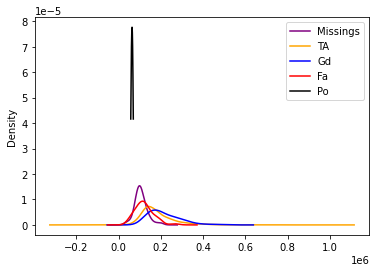

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['BsmtCond'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'TA']['SalePrice'].plot(kind="kde", color="orange", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Fa']['SalePrice'].plot(kind="kde", color="red", label="Fa")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Po']['SalePrice'].plot(kind="kde", color="black", label="Po")

ax.legend()
plt.show()

In [68]:
dataset_cat_missing['BsmtCond'].fillna(value='Fa', inplace=True)

In [69]:
# Comprobación de que aumento la categoría FA, anteriormente habían 45 y ahora hay 82 registros.

dataset_cat_missing['BsmtCond'].value_counts()

TA    1311
Fa      82
Gd      65
Po       2
Name: BsmtCond, dtype: int64

#### Variable _BsmtExposure_

In [70]:
dataHP['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [71]:
dataHP['BsmtExposure'].value_counts()/len(dataset_cat_missing)

No    0.652740
Av    0.151370
Gd    0.091781
Mn    0.078082
Name: BsmtExposure, dtype: float64

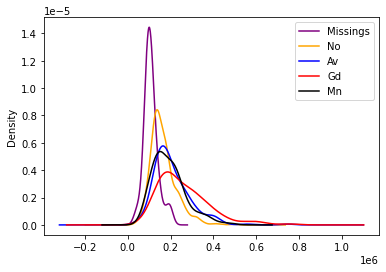

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['BsmtExposure'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'No']['SalePrice'].plot(kind="kde", color="orange", label="No")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Av']['SalePrice'].plot(kind="kde", color="blue", label="Av")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Gd']['SalePrice'].plot(kind="kde", color="red", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Mn']['SalePrice'].plot(kind="kde", color="black", label="Mn")

ax.legend()
plt.show()

In [74]:
dataset_cat_missing['BsmtExposure'].fillna(value='No', inplace=True)

In [75]:
# Comprobación de que aumento la categoría No, anteriormente habían 953 y ahora hay 991 registros.

dataset_cat_missing['BsmtExposure'].value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

#### Variable _BsmtFinType1_

In [76]:
dataHP['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [77]:
dataHP['BsmtFinType1'].value_counts()/len(dataset_cat_missing)

Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: BsmtFinType1, dtype: float64

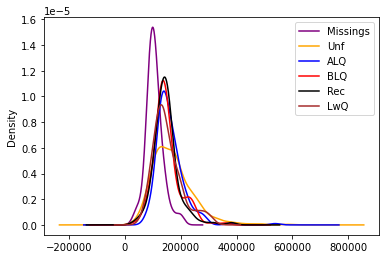

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'Unf']['SalePrice'].plot(kind="kde", color="orange", label="Unf")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'ALQ']['SalePrice'].plot(kind="kde", color="blue", label="ALQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'BLQ']['SalePrice'].plot(kind="kde", color="red", label="BLQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'Rec']['SalePrice'].plot(kind="kde", color="black", label="Rec")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'LwQ']['SalePrice'].plot(kind="kde", color="brown", label="LwQ")

ax.legend()
plt.show()

In [80]:
dataset_cat_missing['BsmtFinType1'].fillna(value='Rec', inplace=True)

In [81]:
# Comprobación de que aumento la categoría Rec, anteriormente habían 143 y ahora hay 170 registros.

dataset_cat_missing['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
Rec    170
BLQ    148
LwQ     74
Name: BsmtFinType1, dtype: int64

#### Variable _BsmtFinType2_

In [82]:
dataHP['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [83]:
dataHP['BsmtFinType2'].value_counts()/len(dataset_cat_missing)

Unf    0.860274
Rec    0.036986
LwQ    0.031507
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64

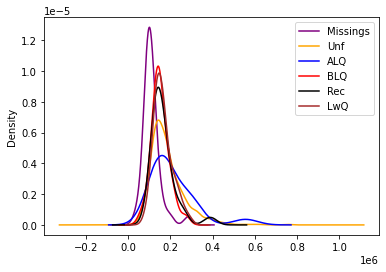

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'Unf']['SalePrice'].plot(kind="kde", color="orange", label="Unf")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'ALQ']['SalePrice'].plot(kind="kde", color="blue", label="ALQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'BLQ']['SalePrice'].plot(kind="kde", color="red", label="BLQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'Rec']['SalePrice'].plot(kind="kde", color="black", label="Rec")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'LwQ']['SalePrice'].plot(kind="kde", color="brown", label="LwQ")

ax.legend()
plt.show()

In [86]:
dataset_cat_missing['BsmtFinType2'].fillna(value='BLQ', inplace=True)

In [87]:
# Comprobación de que aumento la categoría BLQ, anteriormente habían 33 y ahora hay 71 registros.

dataset_cat_missing['BsmtFinType2'].value_counts()

Unf    1256
BLQ      71
Rec      54
LwQ      46
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

#### Variable _Electrical_

<div align="justify">
Si vemos la suma del conteo podemos darnos cuenta que solo hace falta 1 valor. Porque el total de registro es de 1460 y los valores de abajo son 1459. 
    La variable categórica "Electrical" solo tiene un valor NaN, por lo que se puede rellenar con cualquier valor que no es un cambio representativo
</div>


In [88]:
dataHP['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [89]:
dataHP['Electrical'].value_counts()/len(dataset_cat_missing)

SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64

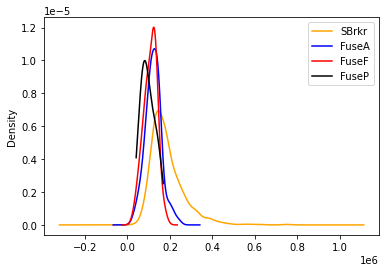

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
#dataset_cat_missing[dataset_cat_missing['Electrical'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['Electrical'] == 'SBrkr']['SalePrice'].plot(kind="kde", color="orange", label="SBrkr")
dataset_cat_missing[dataset_cat_missing['Electrical'] == 'FuseA']['SalePrice'].plot(kind="kde", color="blue", label="FuseA")
dataset_cat_missing[dataset_cat_missing['Electrical'] == 'FuseF']['SalePrice'].plot(kind="kde", color="red", label="FuseF")
dataset_cat_missing[dataset_cat_missing['Electrical'] == 'FuseP']['SalePrice'].plot(kind="kde", color="black", label="FuseP")
#dataset_cat_missing[dataset_cat_missing['Electrical'] == 'Mix']['SalePrice'].plot(kind="kde", color="brown", label="Mix")

ax.legend()
plt.show()

In [92]:
dataset_cat_missing['Electrical'].fillna(value='FuseA', inplace=True)

In [93]:
# Comprobación de que aumento la categoría FuseA, anteriormente habían 94 y ahora hay 95 registros.

dataset_cat_missing['Electrical'].value_counts()

SBrkr    1334
FuseA      95
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

#### Variable _GarageType_

In [94]:
dataHP['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [95]:
dataHP['GarageType'].value_counts()/len(dataset_cat_missing)

Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64

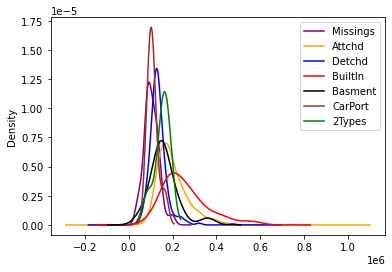

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['GarageType'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['GarageType'] == 'Attchd']['SalePrice'].plot(kind="kde", color="orange", label="Attchd")
dataset_cat_missing[dataset_cat_missing['GarageType'] == 'Detchd']['SalePrice'].plot(kind="kde", color="blue", label="Detchd")
dataset_cat_missing[dataset_cat_missing['GarageType'] == 'BuiltIn']['SalePrice'].plot(kind="kde", color="red", label="BuiltIn")
dataset_cat_missing[dataset_cat_missing['GarageType'] == 'Basment']['SalePrice'].plot(kind="kde", color="black", label="Basment")
dataset_cat_missing[dataset_cat_missing['GarageType'] == 'CarPort']['SalePrice'].plot(kind="kde", color="brown", label="CarPort")
dataset_cat_missing[dataset_cat_missing['GarageType'] == '2Types']['SalePrice'].plot(kind="kde", color="green", label="2Types")

ax.legend()
plt.show()

In [98]:
dataset_cat_missing['GarageType'].fillna(value='Detchd', inplace=True)

In [99]:
# Comprobación de que aumento la categoría Detchd, anteriormente habían 387 y ahora hay 468 registros.

dataset_cat_missing['GarageType'].value_counts()

Attchd     870
Detchd     468
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

#### Variable _GarageFinish_

In [100]:
dataHP['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [101]:
dataHP['GarageFinish'].value_counts()/len(dataset_cat_missing)

Unf    0.414384
RFn    0.289041
Fin    0.241096
Name: GarageFinish, dtype: float64

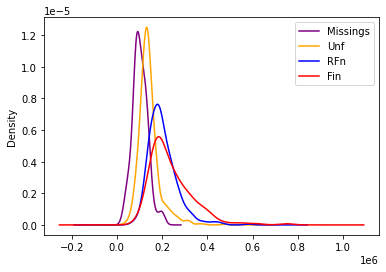

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['GarageFinish'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['GarageFinish'] == 'Unf']['SalePrice'].plot(kind="kde", color="orange", label="Unf")
dataset_cat_missing[dataset_cat_missing['GarageFinish'] == 'RFn']['SalePrice'].plot(kind="kde", color="blue", label="RFn")
dataset_cat_missing[dataset_cat_missing['GarageFinish'] == 'Fin']['SalePrice'].plot(kind="kde", color="red", label="Fin")

ax.legend()
plt.show()

In [104]:
dataset_cat_missing['GarageFinish'].fillna(value='Unf', inplace=True)

In [105]:
# Comprobación de que aumento la categoría Unf, anteriormente habían 605 y ahora hay 686 registros.

dataset_cat_missing['GarageFinish'].value_counts()

Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

#### Variable _GarageCond_

In [106]:
dataHP['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [107]:
dataHP['GarageCond'].value_counts()/len(dataset_cat_missing)

TA    0.908219
Fa    0.023973
Gd    0.006164
Po    0.004795
Ex    0.001370
Name: GarageCond, dtype: float64

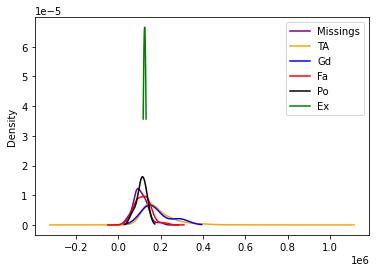

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
dataset_cat_missing[dataset_cat_missing['GarageCond'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="Missings")
dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'TA']['SalePrice'].plot(kind="kde", color="orange", label="TA")
dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'Fa']['SalePrice'].plot(kind="kde", color="red", label="Fa")
dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'Po']['SalePrice'].plot(kind="kde", color="black", label="Po")
dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'Ex']['SalePrice'].plot(kind="kde", color="green", label="Ex")

ax.legend()
plt.show()

In [110]:
dataset_cat_missing['GarageCond'].fillna(value='Unf', inplace=True)

In [111]:
# Debido a que no hay ninguna categoría que se aproxima o se acerca se crea una nueva categoría Unf, si vemos ahora hay 81 y antes no había ningún registro.

dataset_cat_missing['GarageCond'].value_counts()

TA     1326
Unf      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [112]:
dataHP.shape, dataset_cat_missing.shape

((1460, 61), (1460, 11))

In [113]:
dataset_cat_missing.head(40)

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageCond,SalePrice
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,208500
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,181500
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,223500
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,140000
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,250000
5,None,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,Unf,TA,143000
6,Stone,Ex,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,307000
7,Stone,Gd,TA,Mn,ALQ,BLQ,SBrkr,Attchd,RFn,TA,200000
8,None,TA,TA,No,Unf,Unf,FuseF,Detchd,Unf,TA,129900
9,None,TA,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,118000


### Sustituyo las columnas donde hice la imputación de valores categóricas en el dataset original

In [114]:
# Se cambian las columnas calculadas en dataset_cat_missing a las columnas originales de dataHP, así de está manera en el DataFrame dataHP tenemos ya columnas sin NaNs.
# Con esto ya no tenemos NaN en el dataframe

dataHP[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageCond']] = \
dataset_cat_missing[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageCond']].combine_first(dataHP[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageCond']])


In [115]:
dataHP[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageCond']].head(40)

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA
5,None,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,Unf,TA
6,Stone,Ex,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA
7,Stone,Gd,TA,Mn,ALQ,BLQ,SBrkr,Attchd,RFn,TA
8,None,TA,TA,No,Unf,Unf,FuseF,Detchd,Unf,TA
9,None,TA,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA


In [116]:
dataHP.head(40)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2.0,548.0,TA,TA,Y,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,2.0,460.0,TA,TA,Y,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,2.0,608.0,TA,TA,Y,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,3.0,642.0,TA,TA,Y,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,3.0,836.0,TA,TA,Y,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,2.0,480.0,TA,TA,Y,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,2.0,636.0,TA,TA,Y,8,2007,WD,Normal,307000
7,8,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,...,2.0,484.0,TA,TA,Y,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,2.0,468.0,Fa,TA,Y,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,1.0,205.0,Gd,TA,Y,1,2008,WD,Normal,118000


### Solamente la Columna FireplaceQu hace falta por imputar los Nan. Sin embargo, en este caso se toma la decisión de los NaN colocarlos como Missing Value
### Esto porque los NaN eran el 47% de los datos, por lo que se considera que puede ser una variable que en el futuro pueda ayudarnos en caso se complete

In [118]:
dataHP[['FireplaceQu']]

,FireplaceQu
0,NaN
1,TA
2,TA
3,Gd
4,TA
...,...
1455,TA
1456,TA
1457,Gd
1458,NaN


In [119]:
dataHP['FireplaceQu'].fillna(value='missing value', inplace=True)

In [120]:
dataHP[['FireplaceQu']]

,FireplaceQu
0,missing value
1,TA
2,TA
3,Gd
4,TA
...,...
1455,TA
1456,TA
1457,Gd
1458,missing value


### Dataset final con las columnas ya imputadas tanto numéricas como alfanuméricas

In [122]:

dataHP.shape

(1460, 61)

#### Se hacen unas gráficas para poder visualizar cómo están actualmente las variables

In [123]:
dataset = dataHP
col = 'LotArea'

def plotDistBoxQQ(dataset, col):
    #Descripción que muestra las gráficas de distribución, boxplot y QQPlot para detectar Outliers
    #Input: dataset -> pandas dataframe, col->string con nombre de columna
    #Output: visualización de plots.
    
    plt.figure(figsize=(20,6))

    plt.subplot(1,3,1)
    sns.histplot(dataset[col], bins=30)
    plt.title("Histograma y Densidad")


    plt.subplot(1,3,2)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot")

    plt.subplot(1,3,3)
    stats.probplot(dataset[col], dist="norm", plot=plt)
    plt.title("Q-Q plot")

#### Se grafican todas las columnas continuas

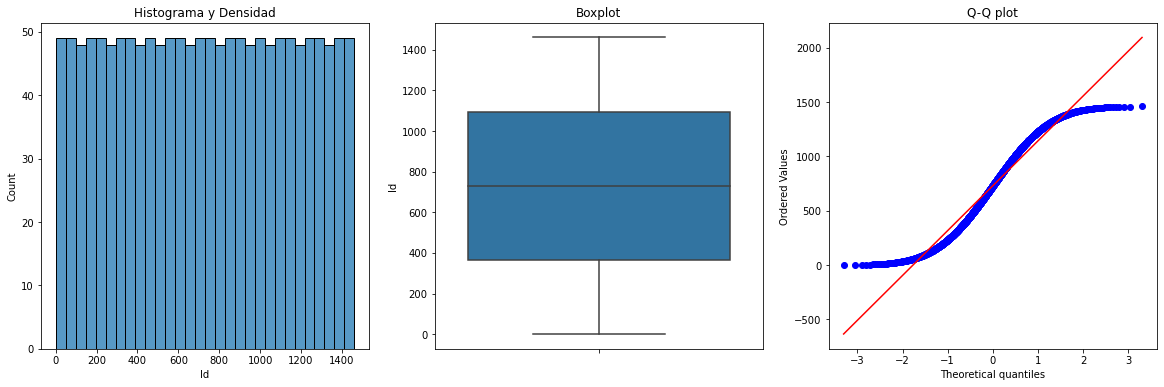

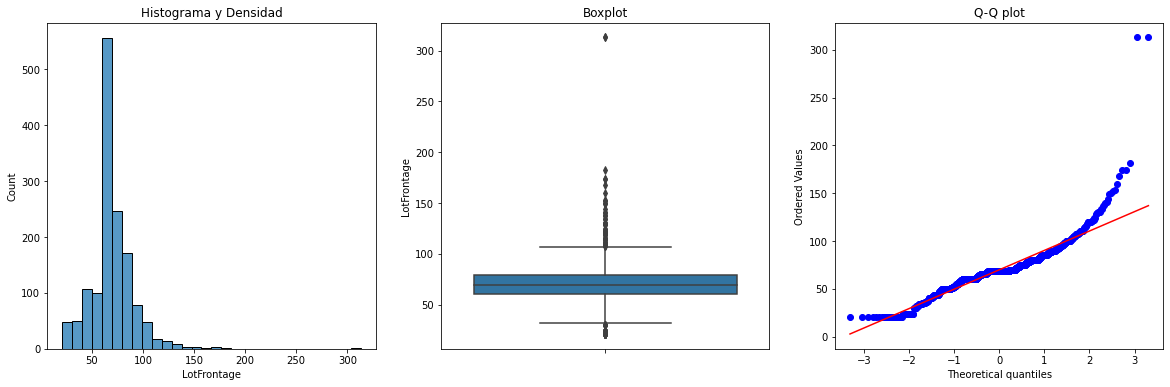

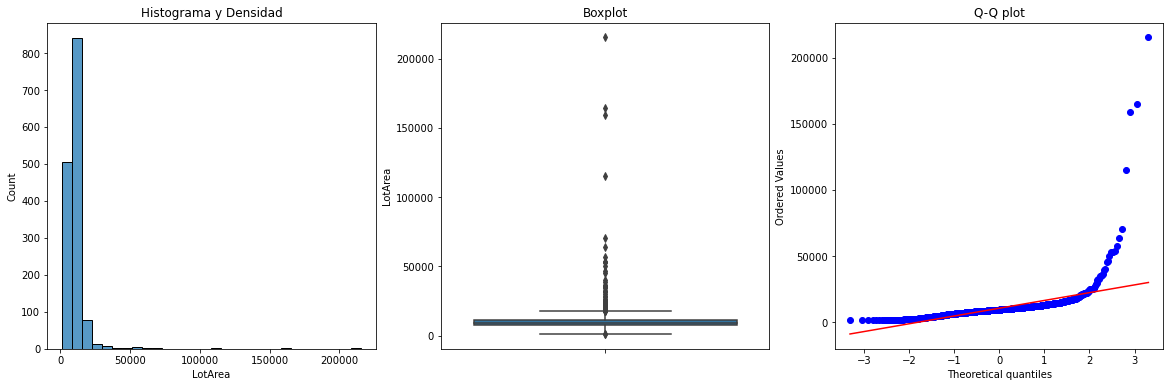

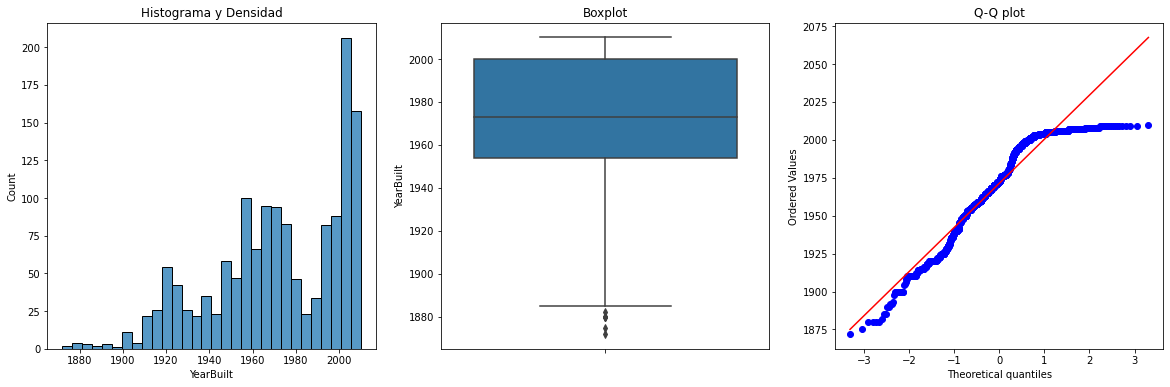

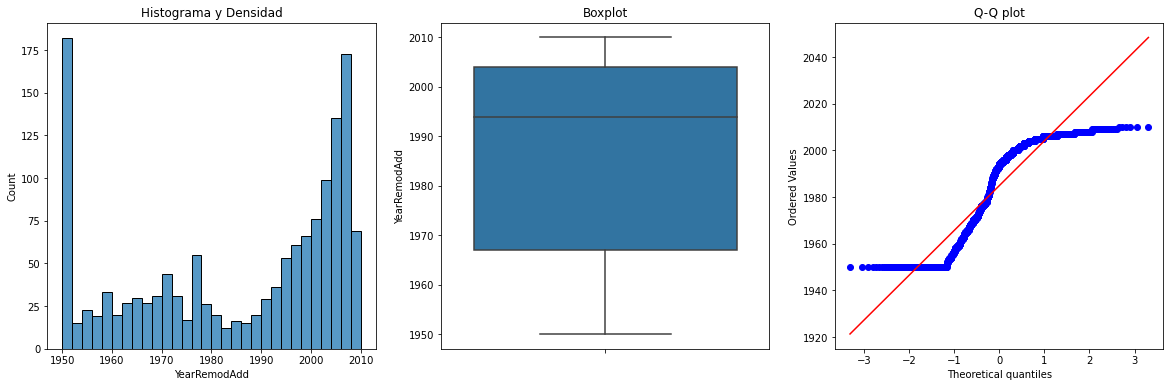

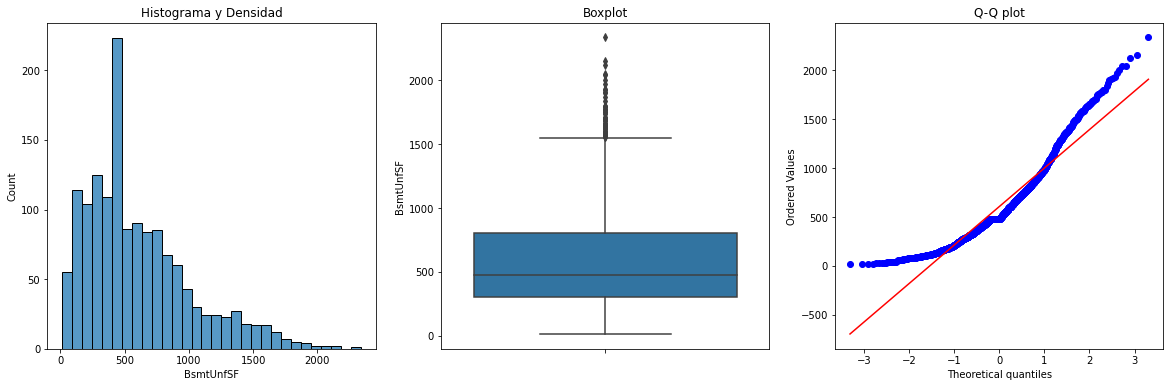

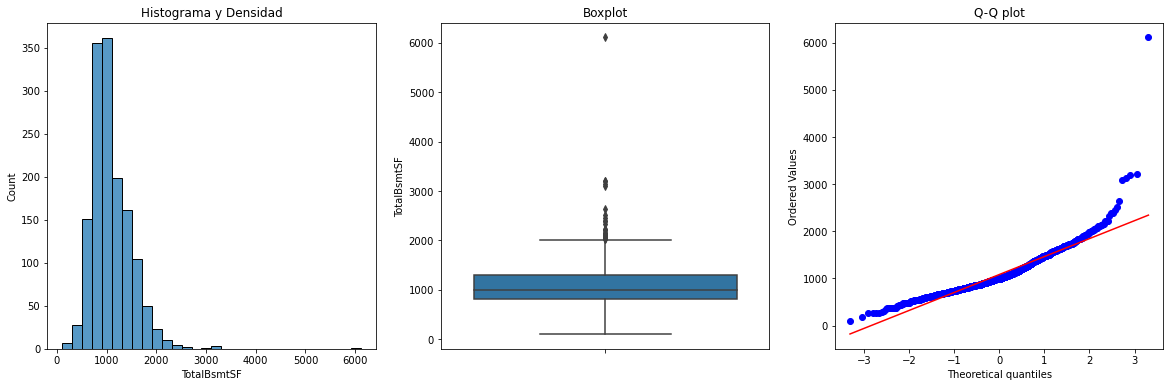

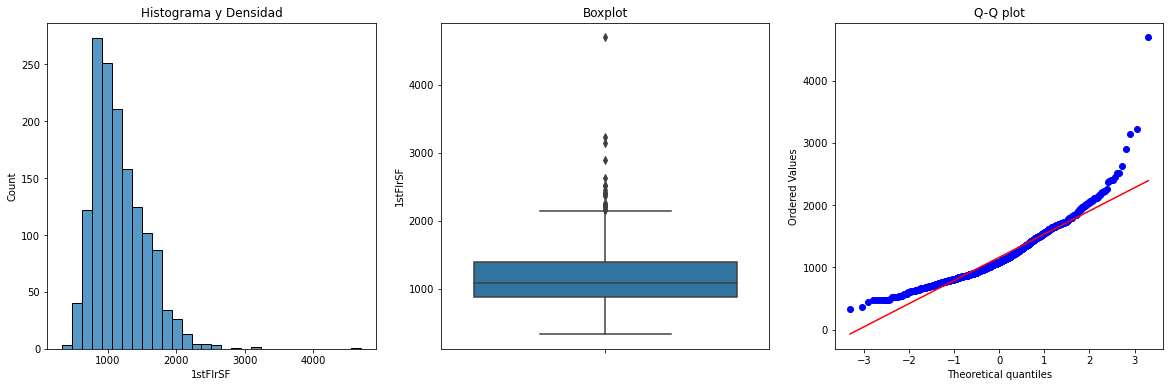

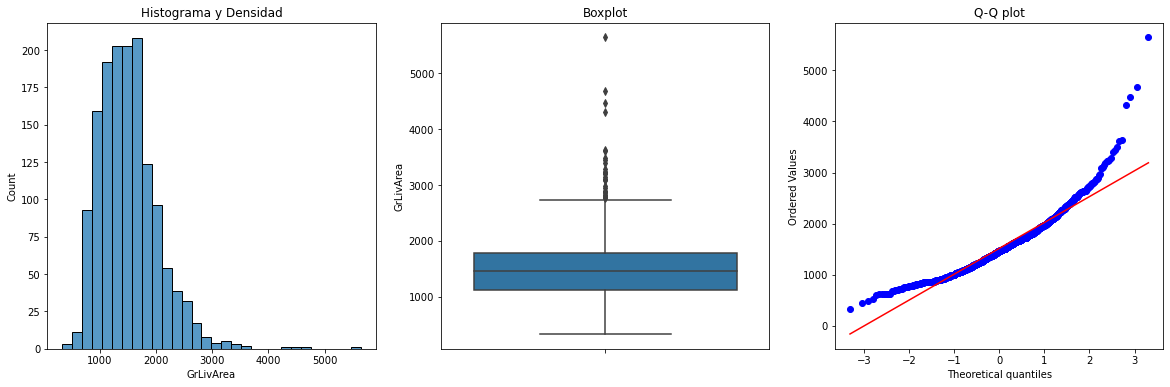

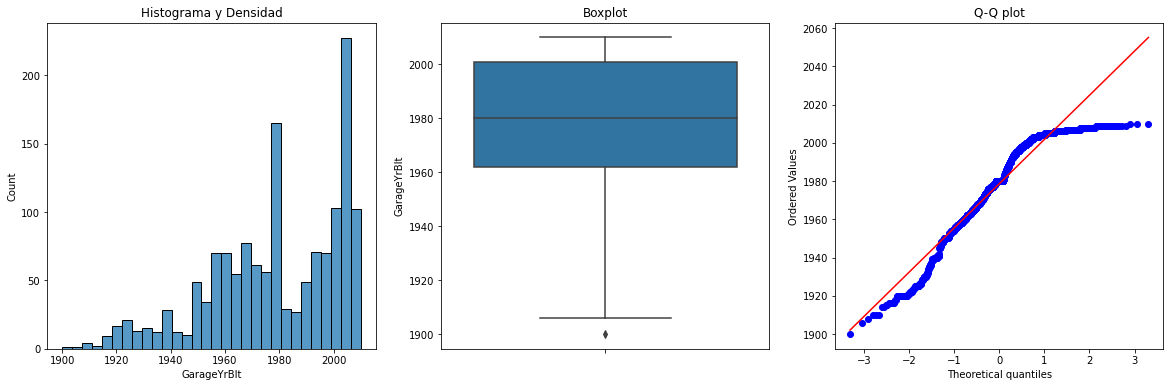

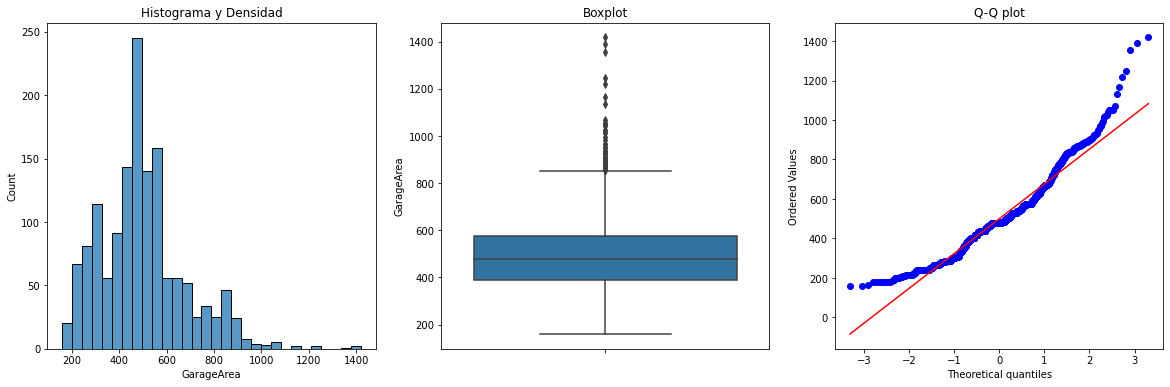

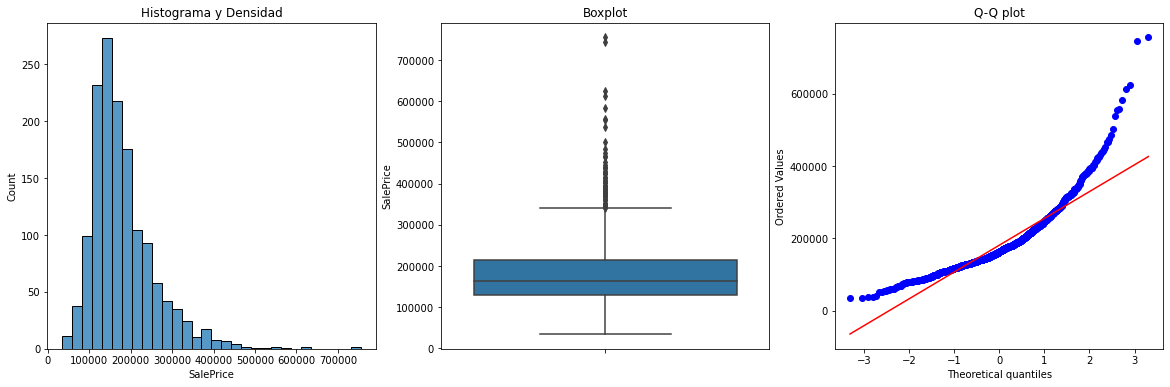

In [130]:
excluded_columns = ['PoolArea','3SsnPorch','LowQualFinSF','MiscVal','BsmtHalfBath','ScreenPorch','BsmtFinSF2','EnclosedPorch','HalfBath','MasVnrArea','BsmtFullBath','2ndFlrSF','WoodDeckSF','Fireplaces','OpenPorchSF','BsmtFinSF1']
for col in continuas:
    if col not in excluded_columns:
    #print(f"---------{col}---------")
        plotDistBoxQQ(dataHP,col)

### Función para Detectar los Limites Inferiores y Superiores de los Outliers 

#### Dentro de la función si en caso existe un Outlier negativo automáticamente le coloca al valor "0", ya que no hace sentido que existan negativos

In [131]:
def detect_outliersLimits(dataset, col):
    """
    Descripción: Calculo los limites superiores e inferiores para detección de outliers
    Input: dataset -> pandas Dataframe, col->string nombre de columnas
    Output: tupla de floats con los limites superiores e inferiores 
    """
    
    IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
    LI = np.where(dataset[col].quantile(0.25) - (IQR * 1.5) >= 0, dataset[col].quantile(0.25) - (IQR * 1.5), 0) # Limite inferior, si en caso devuelve negativo, se pone "0"
    
    #LI = dataset[col].quantile(0.25) - (IQR * 1.75) if (dataset[col].quantile(0.25) - (IQR * 1.75) >= 0) else 0

    LS = dataset[col].quantile(0.75) + (IQR * 1.5) # Limite Superior
    
    
    return LI, LS

In [135]:
continuas =  ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
items_to_drop = ['PoolArea','3SsnPorch','LowQualFinSF','MiscVal','BsmtHalfBath','ScreenPorch','BsmtFinSF2','EnclosedPorch','HalfBath','MasVnrArea','BsmtFullBath','2ndFlrSF','WoodDeckSF','Fireplaces','OpenPorchSF','BsmtFinSF1']

continuas = [item for item in continuas if item not in items_to_drop]
print(continuas)



['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']


In [136]:
# Podemos ver que el limite inferior si en caso es negativo devuelve "0"

LI, LS =  detect_outliersLimits(dataHP, continuas)
LI, LS

(array([   0.   ,   31.5  , 1481.5  , 1885.   , 1911.5  ,    0.   ,
          92.625,  118.125,  158.625, 1903.5  ,  110.375, 3937.5  ]),
 Id                2189.500
 LotFrontage        107.500
 LotArea          17673.500
 YearBuilt         2069.000
 YearRemodAdd      2059.500
 BsmtUnfSF         1559.125
 TotalBsmtSF       2021.625
 1stFlrSF          2155.125
 GrLivArea         2747.625
 GarageYrBlt       2059.500
 GarageArea         855.375
 SalePrice       340037.500
 dtype: float64)

#### Se hace una grafica antes de hacer Capping, a manera de poder comprobar, más adelante se hace todas las columnas automáticamente

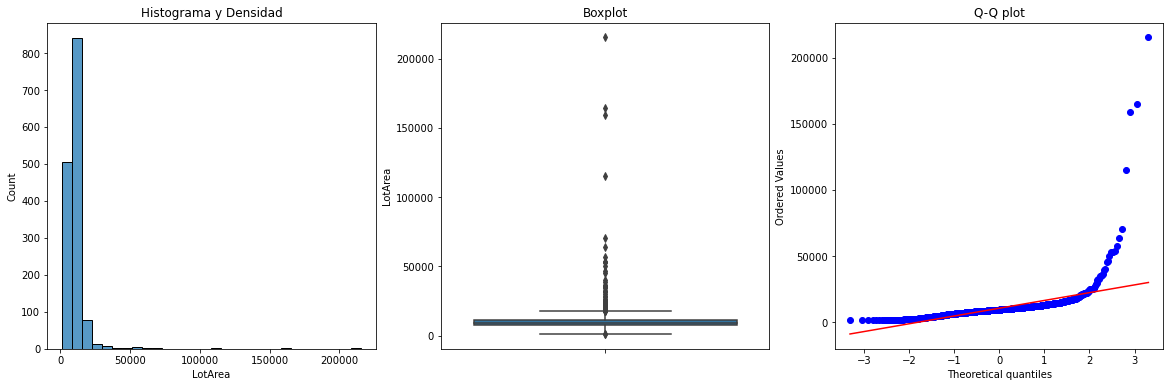

In [137]:
# Se grafica para ver cómo está antes del proceso de Capping
plotDistBoxQQ(dataHP,'LotArea')

## Capping

In [138]:
LI, LS =  detect_outliersLimits(dataHP, 'LotArea')
dataHP['LotArea'] = np.where(dataHP['LotArea'] > LS, LS,
                             np.where(dataHP['LotArea'] < LI, LI, dataHP['LotArea']))

### Como podemos ver en la siguiente gráfica ya se hizo el Capping en la variable y podemos comparar con las gráficas anteriores

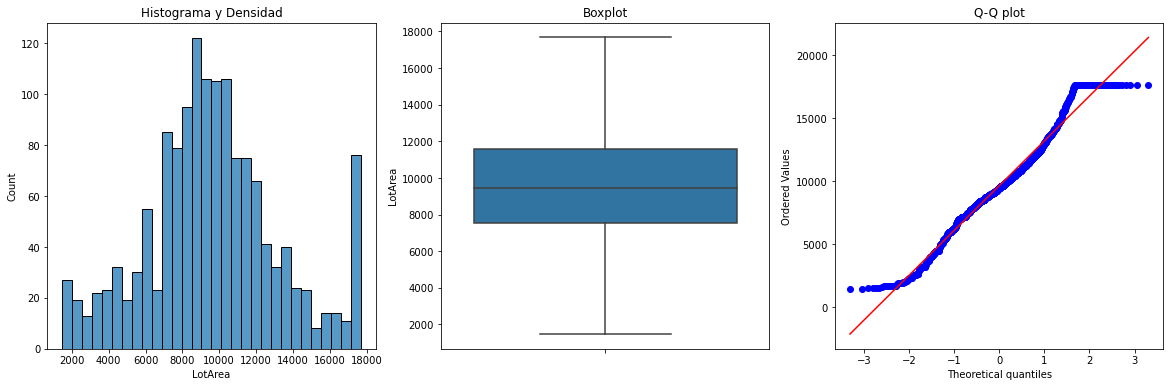

In [139]:
# Se grafica para ver cómo queda después del proceso de Capping
plotDistBoxQQ(dataHP,'LotArea')

### Se hace función para hacer Capping en todas las columnas automáticamente

In [140]:
def cap_columns(dataset, columns, lower_limit=None, upper_limit=None):
    """
    Función para hacer capping a las columns del dataframe 

    Parametros:
    - dataframe: pandas DataFrame to be capped
    - columnas: lista de columnas identificadas para hacer capping (continuas)
    - lower_limit: Limite Inferior para hacer Capping (por default: None)
    - upper_limit: Limite Superior para hacer Capping (por default: None)

    Returns:
    - capped_dataframe: Nuevo DataFrame con las columnas una vez ya se hizo el proceso de Capping
    """

    # se crea un nuevo Dataframe para almacenar las columnas con el proceso de capping
    capped_dataframe = dataset.copy()

    # Iteración sobre las columnas específicas 
    for column in continuas:
        # Se aplica el limite inferior
        if lower_limit is not None:
            capped_dataframe[column] = np.where(capped_dataframe[column] < lower_limit, lower_limit, capped_dataframe[column])

        # Se aplica el limite superior
        if upper_limit is not None:
            capped_dataframe[column] = np.where(capped_dataframe[column] > upper_limit, upper_limit, capped_dataframe[column])

    return capped_dataframe

In [141]:
capped_data = cap_columns(dataset, continuas, lower_limit=LI, upper_limit=LS)

In [142]:
LI, LS =  detect_outliersLimits(dataHP,continuas)
dataHP[continuas] = np.where(dataHP[continuas] > LS, LS,
                             np.where(dataHP[continuas] < LI, LI, dataHP[continuas]))

### Todas las Gráficas una vez ya se hizo capping en las columnas

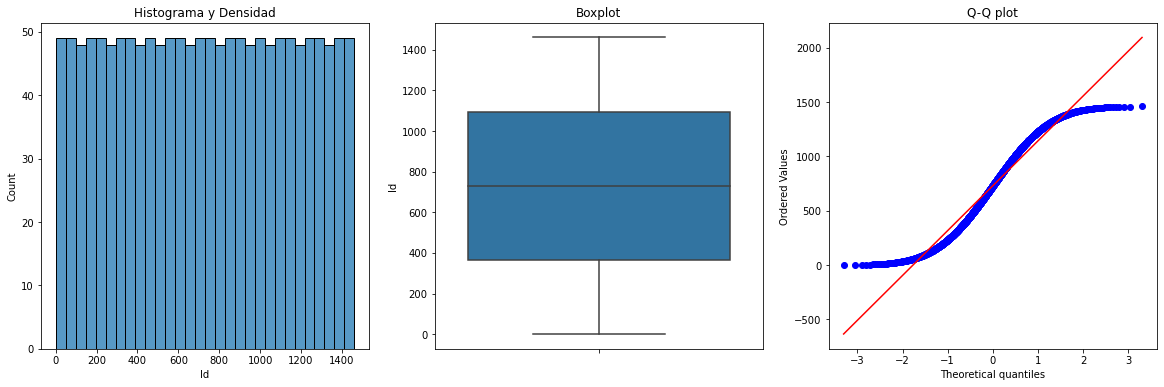

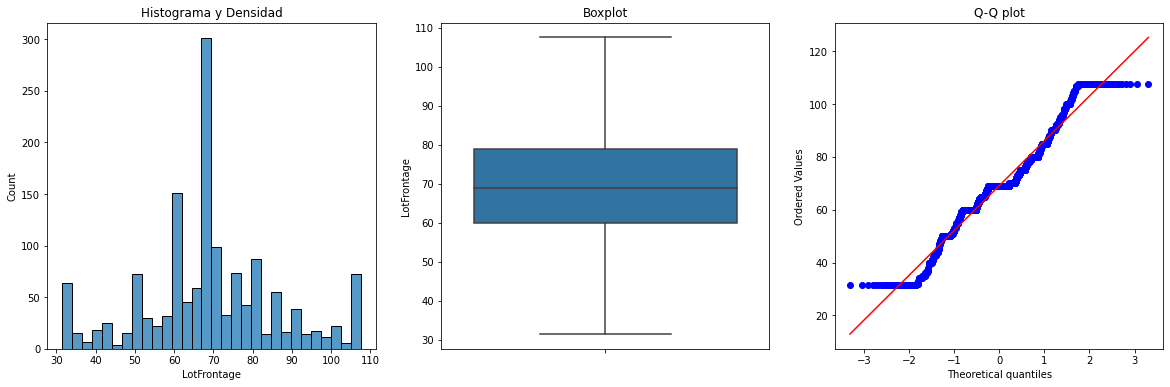

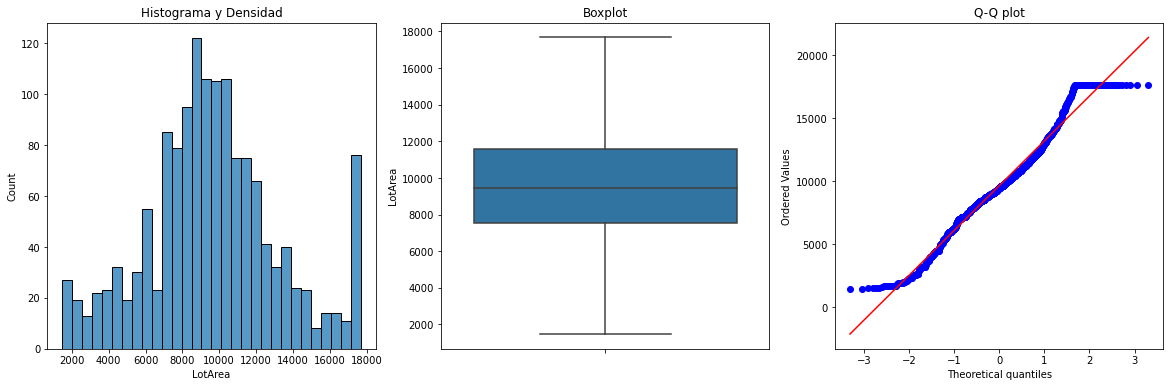

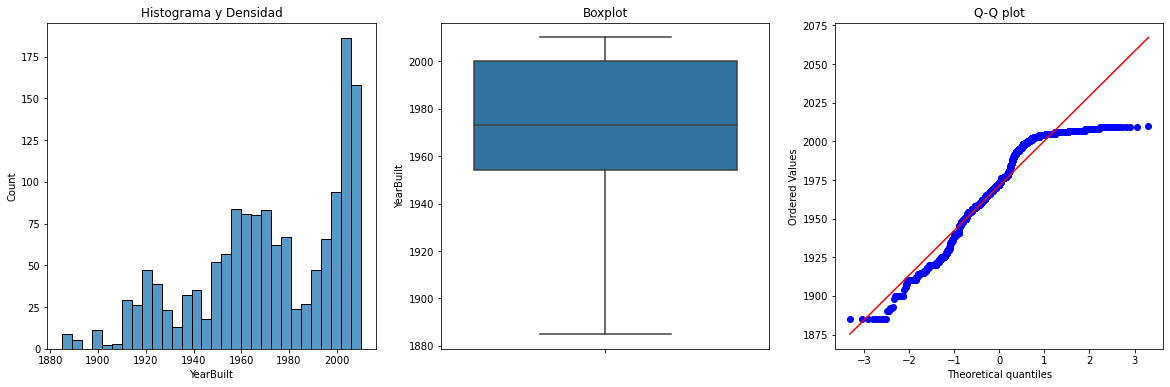

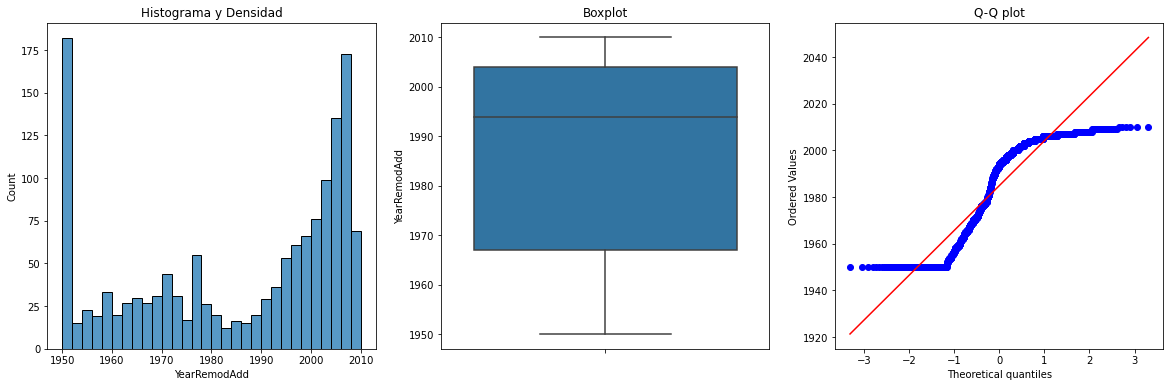

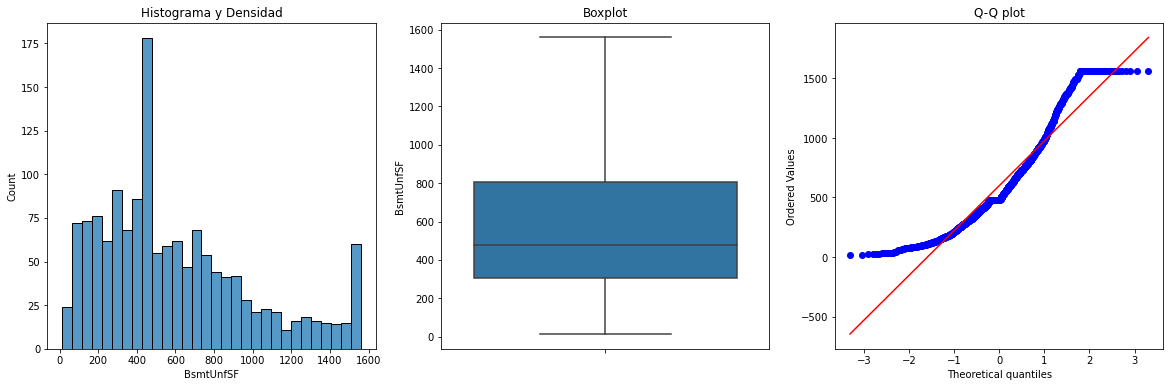

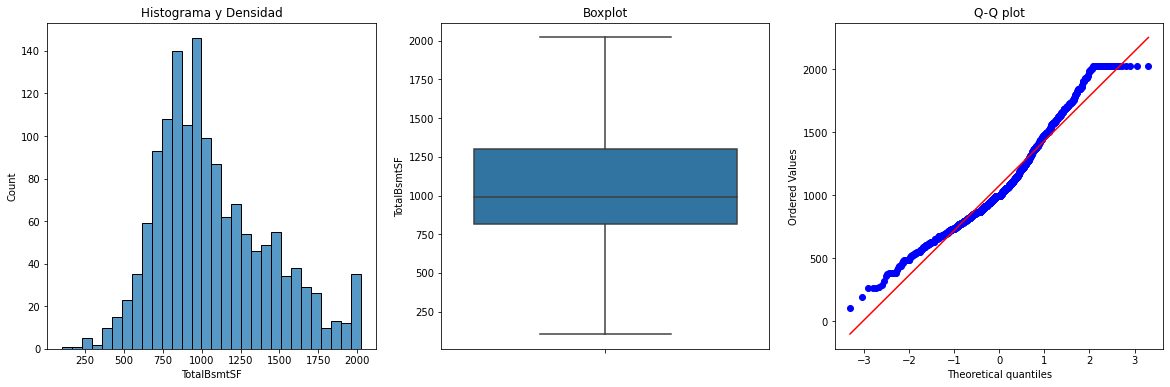

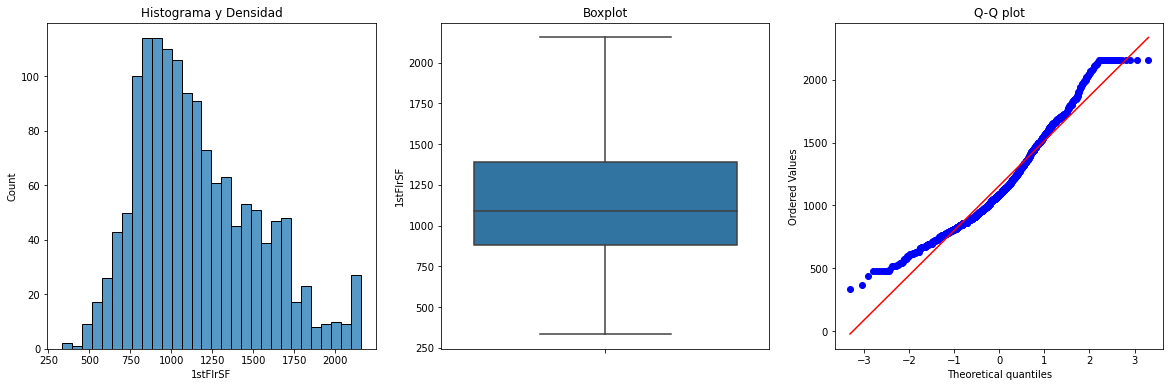

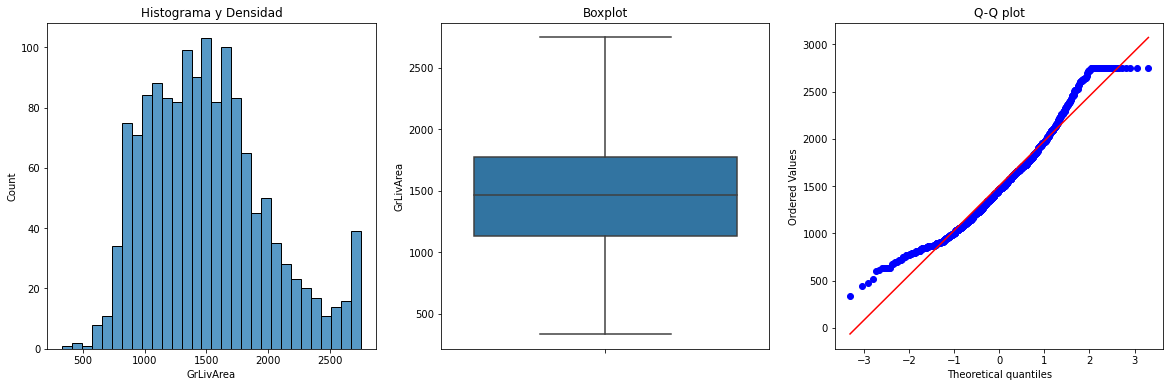

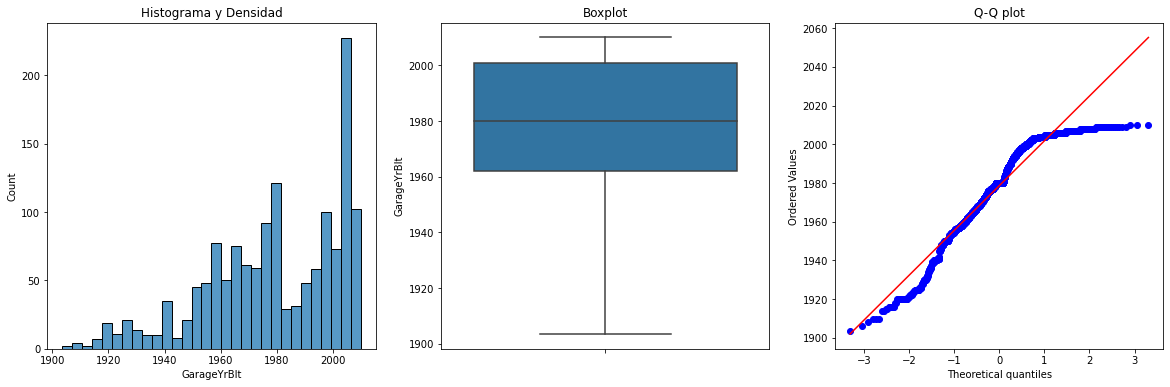

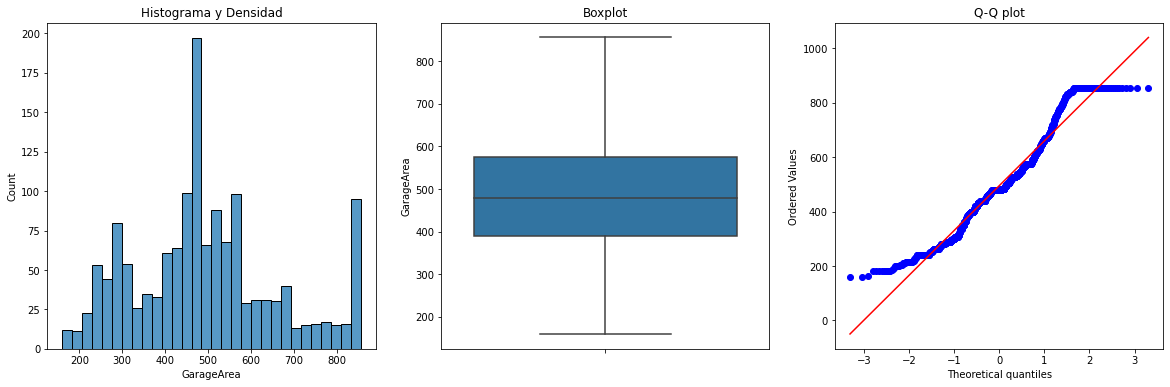

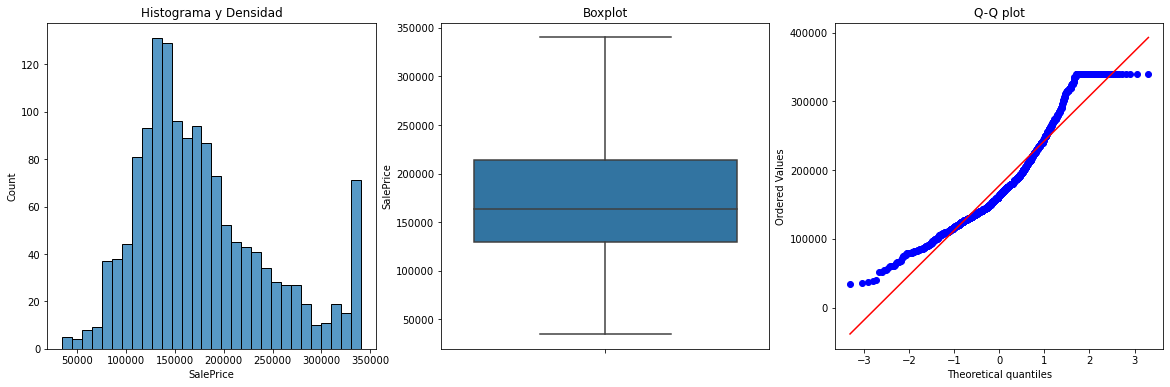

In [143]:
for col in continuas:
    #print(f"---------{col}---------")
    plotDistBoxQQ(dataHP,col)

### Averiguar todas las columnas categóricas para hacer el Frequency Encoding

##### Frequency Encoding

In [144]:
def getCategoryVars(dataset):
    cat_colnames = []
    colnames = dataset.columns
    for col in colnames:
        if(dataset[col].dtype == 'object'):
            cat_colnames.append(col)
    return cat_colnames

In [145]:
cat_cols = getCategoryVars(dataHP)
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [146]:
data_HP_freq_encoding = dataHP[cat_cols]
dataHP.shape, data_HP_freq_encoding.shape

((1460, 61), (1460, 39))

In [147]:
data_HP_freq_encoding.head(20)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,missing value,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,missing value,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,WD,Normal


In [148]:
def freq_encoding (data_HP_freq_encoding, cat_cols):
    for col in cat_cols:
        freq = data_HP_freq_encoding[col].value_counts()
        data_HP_freq_encoding[f'{col}_freq'] = data_HP_freq_encoding[col].map(freq)
    return data_HP_freq_encoding    

In [150]:
data_HP_freq_encoding = freq_encoding(data_HP_freq_encoding, cat_cols)

In [151]:
data_HP_freq_encoding.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual_freq,Functional_freq,FireplaceQu_freq,GarageType_freq,GarageFinish_freq,GarageQual_freq,GarageCond_freq,PavedDrive_freq,SaleType_freq,SaleCondition_freq
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,586,1360,690,870,422,1311.0,1326,1340,1267,1198
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,735,1360,313,870,422,1311.0,1326,1340,1267,1198
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,586,1360,313,870,422,1311.0,1326,1340,1267,1198
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,586,1360,380,468,686,1311.0,1326,1340,1267,101
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,586,1360,313,870,422,1311.0,1326,1340,1267,1198


### Se hace la revión de algunas columnas al azar para comprobar que haya funcionado bien

#### Revisión de Variable _PavedDrive_

In [152]:
data_HP_freq_encoding[['PavedDrive','PavedDrive_freq']].head(40)

,PavedDrive,PavedDrive_freq
0,Y,1340
1,Y,1340
2,Y,1340
3,Y,1340
4,Y,1340
5,Y,1340
6,Y,1340
7,Y,1340
8,Y,1340
9,Y,1340


#### Revisión de Variable _MSZoning_

In [153]:
data_HP_freq_encoding[['MSZoning','MSZoning_freq']].head(40)

,MSZoning,MSZoning_freq
0,RL,1151
1,RL,1151
2,RL,1151
3,RL,1151
4,RL,1151
5,RL,1151
6,RL,1151
7,RL,1151
8,RM,218
9,RL,1151


#### Revisión de Variable _Neighborhood_

In [154]:
data_HP_freq_encoding[['Neighborhood','Neighborhood_freq']].head(40)

,Neighborhood,Neighborhood_freq
0,CollgCr,150
1,Veenker,11
2,CollgCr,150
3,Crawfor,51
4,NoRidge,41
5,Mitchel,49
6,Somerst,86
7,NWAmes,73
8,OldTown,113
9,BrkSide,58


In [155]:
datafinalHP = data_HP_freq_encoding
datafinalHP.shape, data_HP_freq_encoding.shape

((1460, 78), (1460, 78))

In [156]:
data_HP_freq_encoding.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition',
       'MSZoning_freq', 'Street_freq', 'LotShape_freq', 'LandContour_freq',
       'Utilities_freq', 'LotConfig_freq', 'LandSlope_freq',
       'Neighborhood_freq', 'Condition1_freq', 'Condition2_freq',
       'BldgType_freq', 'HouseStyle_freq', 'RoofStyle_freq', 'RoofMatl_freq',
       'Exterior1st_freq', 'Exterior2nd_freq', 'MasVnrType_freq',
       'ExterQual_freq', 'ExterCond_freq', 'Foundation_freq',

In [157]:
data_HP_freq_encoding.drop(['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'], axis=1, inplace=True)

In [158]:
data_HP_freq_encoding.head()

,MSZoning_freq,Street_freq,LotShape_freq,LandContour_freq,Utilities_freq,LotConfig_freq,LandSlope_freq,Neighborhood_freq,Condition1_freq,Condition2_freq,...,KitchenQual_freq,Functional_freq,FireplaceQu_freq,GarageType_freq,GarageFinish_freq,GarageQual_freq,GarageCond_freq,PavedDrive_freq,SaleType_freq,SaleCondition_freq
0,1151,1454,925,1311,1459,1052,1382,150,1260,1445,...,586,1360,690,870,422,1311.0,1326,1340,1267,1198
1,1151,1454,925,1311,1459,47,1382,11,81,1445,...,735,1360,313,870,422,1311.0,1326,1340,1267,1198
2,1151,1454,484,1311,1459,1052,1382,150,1260,1445,...,586,1360,313,870,422,1311.0,1326,1340,1267,1198
3,1151,1454,484,1311,1459,263,1382,51,1260,1445,...,586,1360,380,468,686,1311.0,1326,1340,1267,101
4,1151,1454,484,1311,1459,47,1382,41,1260,1445,...,586,1360,313,870,422,1311.0,1326,1340,1267,1198


In [159]:
data_HP_freq_encoding.columns

Index(['MSZoning_freq', 'Street_freq', 'LotShape_freq', 'LandContour_freq',
       'Utilities_freq', 'LotConfig_freq', 'LandSlope_freq',
       'Neighborhood_freq', 'Condition1_freq', 'Condition2_freq',
       'BldgType_freq', 'HouseStyle_freq', 'RoofStyle_freq', 'RoofMatl_freq',
       'Exterior1st_freq', 'Exterior2nd_freq', 'MasVnrType_freq',
       'ExterQual_freq', 'ExterCond_freq', 'Foundation_freq', 'BsmtQual_freq',
       'BsmtCond_freq', 'BsmtExposure_freq', 'BsmtFinType1_freq',
       'BsmtFinType2_freq', 'Heating_freq', 'HeatingQC_freq',
       'CentralAir_freq', 'Electrical_freq', 'KitchenQual_freq',
       'Functional_freq', 'FireplaceQu_freq', 'GarageType_freq',
       'GarageFinish_freq', 'GarageQual_freq', 'GarageCond_freq',
       'PavedDrive_freq', 'SaleType_freq', 'SaleCondition_freq'],
      dtype='object')

In [160]:
data_HP_freq_encoding

,MSZoning_freq,Street_freq,LotShape_freq,LandContour_freq,Utilities_freq,LotConfig_freq,LandSlope_freq,Neighborhood_freq,Condition1_freq,Condition2_freq,...,KitchenQual_freq,Functional_freq,FireplaceQu_freq,GarageType_freq,GarageFinish_freq,GarageQual_freq,GarageCond_freq,PavedDrive_freq,SaleType_freq,SaleCondition_freq
0,1151,1454,925,1311,1459,1052,1382,150,1260,1445,...,586,1360,690,870,422,1311.0,1326,1340,1267,1198
1,1151,1454,925,1311,1459,47,1382,11,81,1445,...,735,1360,313,870,422,1311.0,1326,1340,1267,1198
2,1151,1454,484,1311,1459,1052,1382,150,1260,1445,...,586,1360,313,870,422,1311.0,1326,1340,1267,1198
3,1151,1454,484,1311,1459,263,1382,51,1260,1445,...,586,1360,380,468,686,1311.0,1326,1340,1267,101
4,1151,1454,484,1311,1459,47,1382,41,1260,1445,...,586,1360,313,870,422,1311.0,1326,1340,1267,1198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1151,1454,925,1311,1459,1052,1382,79,1260,1445,...,735,1360,313,870,422,1311.0,1326,1340,1267,1198
1456,1151,1454,925,1311,1459,1052,1382,73,1260,1445,...,735,31,313,870,686,1311.0,1326,1340,1267,1198
1457,1151,1454,925,1311,1459,1052,1382,51,1260,1445,...,586,1360,380,870,422,1311.0,1326,1340,1267,1198
1458,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,586,1360,690,870,686,1311.0,1326,1340,1267,1198


In [161]:
dataHP

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,2.0,548.0,TA,TA,Y,2,2008,WD,Normal,208500.0
1,2.0,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,2.0,460.0,TA,TA,Y,5,2007,WD,Normal,181500.0
2,3.0,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,2.0,608.0,TA,TA,Y,9,2008,WD,Normal,223500.0
3,4.0,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,3.0,642.0,TA,TA,Y,2,2006,WD,Abnorml,140000.0
4,5.0,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,3.0,836.0,TA,TA,Y,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,...,2.0,460.0,TA,TA,Y,8,2007,WD,Normal,175000.0
1456,1457.0,20,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,...,2.0,500.0,TA,TA,Y,2,2010,WD,Normal,210000.0
1457,1458.0,70,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,...,1.0,252.0,TA,TA,Y,5,2010,WD,Normal,266500.0
1458,1459.0,20,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,...,1.0,240.0,TA,TA,Y,4,2010,WD,Normal,142125.0


In [162]:
# Saber cuáles columnas tengo en el dataHP y no en data_HP_freq_encoding

print(set(dataHP.columns) - set(data_HP_freq_encoding.columns))

{'Street', '1stFlrSF', 'LotConfig', 'GarageCars', 'RoofMatl', 'Functional', 'GarageYrBlt', 'YrSold', 'KitchenAbvGr', 'TotalBsmtSF', 'OverallQual', 'ExterCond', 'GarageArea', 'MoSold', 'FireplaceQu', 'BldgType', 'Utilities', 'GarageCond', 'RoofStyle', 'FullBath', 'BsmtCond', 'BedroomAbvGr', 'Exterior1st', 'LandSlope', 'Condition2', 'YearRemodAdd', 'MasVnrType', 'GrLivArea', 'GarageFinish', 'HouseStyle', 'LotFrontage', 'MSSubClass', 'MSZoning', 'Condition1', 'Exterior2nd', 'BsmtExposure', 'OverallCond', 'BsmtQual', 'Electrical', 'Neighborhood', 'LandContour', 'YearBuilt', 'Foundation', 'BsmtFinType1', 'GarageQual', 'SalePrice', 'ExterQual', 'SaleCondition', 'CentralAir', 'LotShape', 'BsmtFinType2', 'Heating', 'GarageType', 'PavedDrive', 'LotArea', 'SaleType', 'BsmtUnfSF', 'KitchenQual', 'HeatingQC', 'TotRmsAbvGrd', 'Id'}


In [163]:
# Saber cuáles columnas tengo en data_HP_freq_encoding y no en dataHP

print(set(data_HP_freq_encoding.columns) - set(dataHP.columns))

{'Electrical_freq', 'Neighborhood_freq', 'BsmtFinType1_freq', 'Functional_freq', 'BldgType_freq', 'LandContour_freq', 'PavedDrive_freq', 'MSZoning_freq', 'GarageType_freq', 'RoofStyle_freq', 'GarageCond_freq', 'LotShape_freq', 'Condition2_freq', 'HouseStyle_freq', 'ExterCond_freq', 'HeatingQC_freq', 'ExterQual_freq', 'KitchenQual_freq', 'GarageFinish_freq', 'Street_freq', 'MasVnrType_freq', 'GarageQual_freq', 'LandSlope_freq', 'BsmtQual_freq', 'BsmtCond_freq', 'SaleType_freq', 'SaleCondition_freq', 'Exterior1st_freq', 'BsmtFinType2_freq', 'FireplaceQu_freq', 'Utilities_freq', 'Heating_freq', 'Condition1_freq', 'RoofMatl_freq', 'CentralAir_freq', 'BsmtExposure_freq', 'Foundation_freq', 'LotConfig_freq', 'Exterior2nd_freq'}


In [164]:
# Sustituyo las variables o columnas categóricas en la Tabla Original para mostrar solo valores numéricos en toda la tabla

dataHP[['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']] = \
    data_HP_freq_encoding[['MSZoning_freq','Street_freq','LotShape_freq','LandContour_freq','Utilities_freq','LotConfig_freq','LandSlope_freq','Neighborhood_freq','Condition1_freq','Condition2_freq','BldgType_freq','HouseStyle_freq','RoofStyle_freq','RoofMatl_freq','Exterior1st_freq','Exterior2nd_freq','MasVnrType_freq','ExterQual_freq','ExterCond_freq','Foundation_freq','BsmtQual_freq','BsmtCond_freq','BsmtExposure_freq','BsmtFinType1_freq','BsmtFinType2_freq','Heating_freq','HeatingQC_freq','CentralAir_freq','Electrical_freq','KitchenQual_freq','Functional_freq','FireplaceQu_freq','GarageType_freq','GarageFinish_freq','GarageQual_freq','GarageCond_freq','PavedDrive_freq','SaleType_freq','SaleCondition_freq']].values


## Tabla Final ya PreProcesada

<div align="justify">
    Luego de hacer <b>Ingeniería de Características</b> en las diferentes variables (PreProcesado), en donde a manera de resumen podemos decir, que primero se cargo un dataset que consistía en 1460 registros y 81 variables o columnas, se procedió a revisar si había valores faltantes (NaN) o valores ceros ("0") y en base al porcentaje de estos se tomo la decisión de desechar las columnas que tuvieran mayor a 20% a excepción de la columna FirePlaceQa (47%) que se dejo para un análisis futuro en caso se completara. Se hizo <b>imputación de variables numéricas</b> a las que tenían menos del 5% de NaN. De igual manera también se hizo <b>imputación de variables categóricas</b> a las que también presentaban menos del 5% de NaN y en base a las gráficas de densidad se sustituía por la categoría que mejor se adecuaba a la original. Después se hizo el proceso de <b>Outliers</b> a las variables continuas, este proceso incluye el paso de <b>Capping</b>, el cual consiste en tomar ese Outlier y acercarlo al limite superior y de igual manera con los valores negativos acercarlos al "0", ya que no tiene sentido que existan valores negativos. Finalmente se hizo <b>Frequency Encoding</b> a las variables categóricas para tener una Tabla Final lista para poder trabajarla.

#### 1. Revisar a manera general el dataset <b>"dataHP"<b>.
#### 2. Determinar los NaN y los ceros ("0") en las diferentes variables.
#### 3. Se hizo imputación de variables numéricas a las que tenían menos de 5% de NaN o ceros ("0").
#### 4. Se hizo también imputación de variables categóricas a las que tenían menos de 5% de NaN.
#### 5. Proceso de Outliers y Capping
#### 6. Se hizo Frequency Encoding 
    
 

In [165]:
dataHP

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60,1151.0,65.0,8450.0,1454.0,925.0,1311.0,1459.0,1052.0,...,2.0,548.0,1311.0,1326.0,1340.0,2,2008,1267.0,1198.0,208500.0
1,2.0,20,1151.0,80.0,9600.0,1454.0,925.0,1311.0,1459.0,47.0,...,2.0,460.0,1311.0,1326.0,1340.0,5,2007,1267.0,1198.0,181500.0
2,3.0,60,1151.0,68.0,11250.0,1454.0,484.0,1311.0,1459.0,1052.0,...,2.0,608.0,1311.0,1326.0,1340.0,9,2008,1267.0,1198.0,223500.0
3,4.0,70,1151.0,60.0,9550.0,1454.0,484.0,1311.0,1459.0,263.0,...,3.0,642.0,1311.0,1326.0,1340.0,2,2006,1267.0,101.0,140000.0
4,5.0,60,1151.0,84.0,14260.0,1454.0,484.0,1311.0,1459.0,47.0,...,3.0,836.0,1311.0,1326.0,1340.0,12,2008,1267.0,1198.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60,1151.0,62.0,7917.0,1454.0,925.0,1311.0,1459.0,1052.0,...,2.0,460.0,1311.0,1326.0,1340.0,8,2007,1267.0,1198.0,175000.0
1456,1457.0,20,1151.0,85.0,13175.0,1454.0,925.0,1311.0,1459.0,1052.0,...,2.0,500.0,1311.0,1326.0,1340.0,2,2010,1267.0,1198.0,210000.0
1457,1458.0,70,1151.0,66.0,9042.0,1454.0,925.0,1311.0,1459.0,1052.0,...,1.0,252.0,1311.0,1326.0,1340.0,5,2010,1267.0,1198.0,266500.0
1458,1459.0,20,1151.0,68.0,9717.0,1454.0,925.0,1311.0,1459.0,1052.0,...,1.0,240.0,1311.0,1326.0,1340.0,4,2010,1267.0,1198.0,142125.0
